<a href="https://colab.research.google.com/github/Nimesh-07/Car_Auction_ML_Project/blob/main/car_auction_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('auction-car-ml-project')
jovian.set_colab_id('1SZg8ZCFJLvMXxqOTS8hAsUxN3zcKhc4l')

# car-auction-ml-project

Use the "Run" button to execute the code.

In [ ]:

!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="auction-car-ml-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/auction-car-ml-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/auction-car-ml-project


'https://jovian.ai/nimesh-singh-mech/auction-car-ml-project'

In [ ]:
import os
import numpy as np
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importing dataset from kaggel competition

od.download('https://www.kaggle.com/c/DontGetKicked')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nimeshsingh07
Your Kaggle Key: ········


100%|██████████| 10.2M/10.2M [00:00<00:00, 56.2MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [ ]:
os.listdir('DontGetKicked')

['test.csv',
 'test.zip',
 'example_entry.csv',
 'Carvana_Data_Dictionary.txt',
 'training.csv',
 'training.zip']

In [ ]:
train = pd.read_csv('DontGetKicked/training.csv')
test = pd.read_csv('DontGetKicked/test.csv')
example_entry = pd.read_csv('DontGetKicked/example_entry.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

In [ ]:
pd.set_option("display.max_columns", None)
train.sample(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
6566,6573,0,6/4/2010,MANHEIM,2006,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,GREEN,AUTO,2.0,Covers,73108,AMERICAN,MEDIUM,CHRYSLER,5950.0,7323.0,10243.0,12607.0,6194.0,7031.0,9346.0,9963.0,NaN,NaN,99750,85040,AZ,6000.0,0,1389
71362,71394,0,7/2/2009,ADESA,2003,6,NISSAN,XTERRA 4WD V6 3.3L V,SE,4D SPORT UTILITY SE,GREEN,AUTO,1.0,Alloy,64687,TOP LINE ASIAN,MEDIUM SUV,OTHER,6877.0,7905.0,7927.0,9037.0,6629.0,7925.0,7659.0,9059.0,NaN,NaN,20928,28273,NC,9550.0,0,1028
69677,69709,0,6/10/2009,ADESA,2005,4,CHRYSLER,PACIFICA AWD 3.5L V6,Tou,4D SPORT,WHITE,AUTO,1.0,Alloy,78815,AMERICAN,CROSSOVER,CHRYSLER,6709.0,8078.0,7746.0,9224.0,6973.0,8453.0,8031.0,9629.0,NaN,NaN,21053,85226,AZ,8765.0,0,1857
46975,46999,0,6/30/2009,MANHEIM,2005,4,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,4D SEDAN,WHITE,AUTO,2.0,Covers,89827,AMERICAN,LARGE,GM,4573.0,5967.0,5439.0,6944.0,4253.0,5659.0,5093.0,6612.0,NaN,NaN,20207,75050,TX,4810.0,0,2152
32921,32943,0,8/4/2009,MANHEIM,2005,4,CHEVROLET,UPLANDER FWD V6 3.5L,LS,PASSENGER EXT 3.5L LS,WHITE,AUTO,1.0,Alloy,79697,AMERICAN,VAN,GM,6677.0,8619.0,7711.0,9809.0,6804.0,8538.0,7848.0,9721.0,NaN,NaN,22916,80022,CO,7060.0,0,2091
47252,47276,0,1/12/2010,MANHEIM,2007,3,DODGE,CARAVAN GRAND FWD V6,SE,MINIVAN 3.3L,SILVER,AUTO,2.0,Covers,76386,AMERICAN,VAN,CHRYSLER,6885.0,8349.0,11244.0,12547.0,8055.0,9952.0,11401.0,14086.0,NaN,NaN,20207,75050,TX,6525.0,0,1623
8750,8758,0,9/10/2010,MANHEIM,2006,4,MITSUBISHI,ENDEAVOR FWD,LS,4D SPORT UTILITY LS,RED,AUTO,1.0,Alloy,84837,OTHER ASIAN,MEDIUM SUV,OTHER,8157.0,9304.0,11641.0,12714.0,7461.0,8378.0,10809.0,11757.0,NaN,NaN,18111,30272,GA,8010.0,0,594
53005,53033,0,9/22/2010,MANHEIM,2007,3,MITSUBISHI,GALANT 4C,ES,4D SEDAN,GREY,AUTO,2.0,Covers,64662,OTHER ASIAN,MEDIUM,OTHER,7730.0,8891.0,11191.0,12113.0,7398.0,8490.0,10745.0,11798.0,NaN,NaN,18111,37122,TN,7730.0,0,533
19752,19765,1,9/28/2009,OTHER,2005,4,FORD,EXPEDITION 4WD V8 5.,XLT,4D SUV 5.4L XLT,SILVER,AUTO,1.0,Alloy,85320,AMERICAN,LARGE SUV,FORD,11123.0,13097.0,12513.0,14645.0,10162.0,12177.0,14162.0,16393.0,NaN,NaN,21053,95673,CA,10420.0,0,1503
60876,60905,0,3/11/2010,MANHEIM,2002,8,GMC,ENVOY 4WD 6C,SLE,4D UTILITY 4.2L SLE,SILVER,AUTO,1.0,Alloy,82198,AMERICAN,MEDIUM SUV,GM,5815.0,6892.0,8783.0,9933.0,5756.0,6498.0,8584.0,9196.0,NaN,NaN,19638,33762,FL,8535.0,0,2452


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/auction-car-ml-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/auction-car-ml-project


'https://jovian.ai/nimesh-singh-mech/auction-car-ml-project'

# EDA



In [ ]:
EDA_df = train.copy()
EDA_df.groupby("IsBadBuy")

In [ ]:
corr = EDA_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


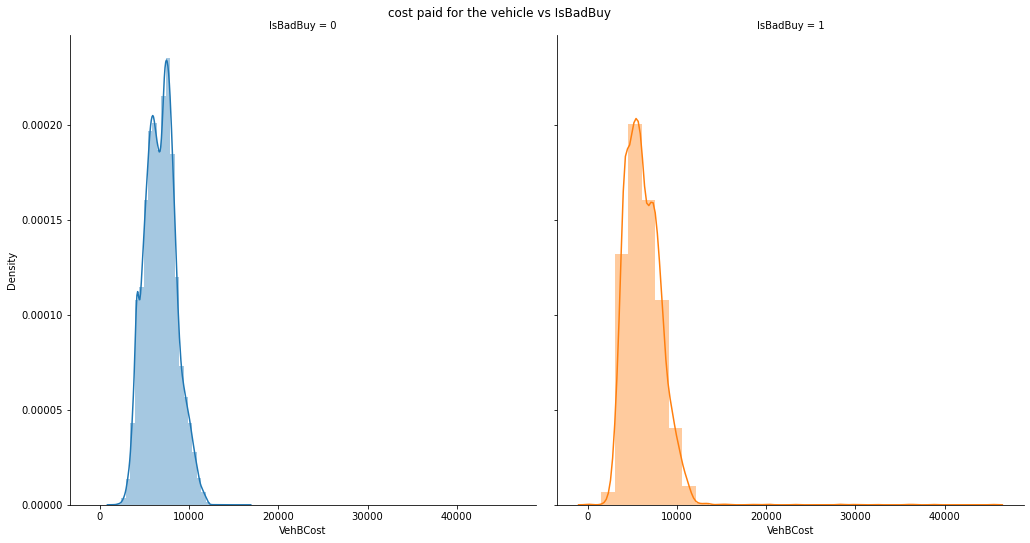

In [ ]:
grid = sns.FacetGrid(EDA_df, col="IsBadBuy",hue = 'IsBadBuy' ,height=5)
grid.map(sns.distplot,'VehBCost',bins = 30);
grid.fig.suptitle('cost paid for the vehicle vs IsBadBuy')
grid.fig.set_size_inches(15,8)
plt.show()

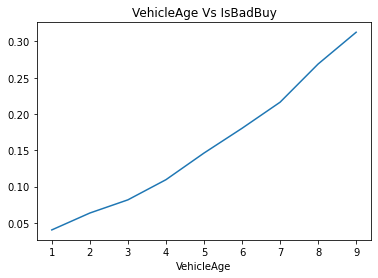

In [ ]:
EDA_df.groupby('VehicleAge').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot(title = "VehicleAge Vs IsBadBuy")
plt.show()

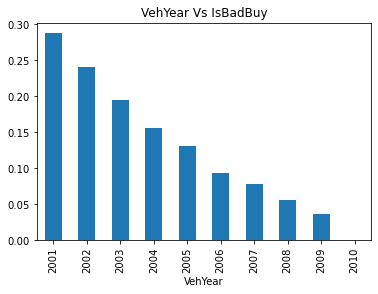

In [ ]:
EDA_df.groupby("VehYear").mean()["IsBadBuy"].plot.bar(title = "VehYear Vs IsBadBuy")
plt.show()

# Preprossesing and feature Engineering

## Date

We will split the date column into separate columns and change data type from object to Numerical

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['PurchDate'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(train)
split_date(test)

In [ ]:
train.info()

In [ ]:
train.sample(10)

In [ ]:
print('The unique number of data is Model column are: ',len(train['Model'].unique()))
print('The unique number of data is Trim column are: ',len(train['Trim'].unique()))
print('The unique number of data is SubModel column are: ',len(train['SubModel'].unique()))



The unique number of data is Model column are:  1063
The unique number of data is Trim column are:  135
The unique number of data is SubModel column are:  864


The following columns should be dropped:
1. Model
2. Trim
3. SubModel 
as these have a lot of unique values and the model will not be able to make sense with the number data points provided.7

4. PurchDate and VehYear are irrelevant as we already have VehicalAge
5. VNZIIP1 and VNST as data should not affect the outcome logically
6. BYRNO and RefID are unique identifiers

In [ ]:
input_cols = ['Auction', 'VehicleAge', 'Make', 
              'WarrantyCost', 'Year', 'Month', 'Day', 'WeekOfYear',
              'VehBCost', 'IsOnlineSale', 'Color', 'Transmission', 
              'WheelTypeID', 'VehOdo', 'Nationality', 'Size',  'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
              'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',  'MMRCurrentRetailCleanPrice', 
              'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice']
target_col = 'IsBadBuy'

In [ ]:
inputs = train[input_cols].copy()
targets = train[target_col].copy()

In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            72983 non-null  object 
 1   VehicleAge                         72983 non-null  int64  
 2   Make                               72983 non-null  object 
 3   WarrantyCost                       72983 non-null  int64  
 4   Year                               72983 non-null  int64  
 5   Month                              72983 non-null  int64  
 6   Day                                72983 non-null  int64  
 7   WeekOfYear                         72983 non-null  UInt32 
 8   VehBCost                           72983 non-null  float64
 9   IsOnlineSale                       72983 non-null  int64  
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [ ]:
test_inputs = test[input_cols].copy()

In [ ]:
numeric_cols = ['VehicleAge', 
              'WarrantyCost', 'Year', 'Month', 'Day', 'WeekOfYear',
              'VehBCost', 'IsOnlineSale',
              'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
              'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',  'MMRCurrentRetailCleanPrice',
              'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice']

categorical_cols = ['Auction', 'Make', 'Color', 'Transmission', 
              'Nationality', 'Size',  'TopThreeAmericanName']

In [ ]:
len(numeric_cols) + len(categorical_cols)

25

In [ ]:
# Impute Missing data

inputs[numeric_cols].isna().sum()

VehicleAge                           0
WarrantyCost                         0
Year                                 0
Month                                0
Day                                  0
WeekOfYear                           0
VehBCost                             0
IsOnlineSale                         0
WheelTypeID                          0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
dtype: int64

In [ ]:
test_inputs[numeric_cols].isna().sum()

VehicleAge                           0
WarrantyCost                         0
Year                                 0
Month                                0
Day                                  0
WeekOfYear                           0
VehBCost                             0
IsOnlineSale                         0
WheelTypeID                          0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
dtype: int64

In [ ]:
inputs.loc[inputs['WheelTypeID'] == 0]

,Auction,VehicleAge,Make,WarrantyCost,Year,Month,Day,WeekOfYear,VehBCost,IsOnlineSale,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice
39,ADESA,5,FORD,728,2010,1,4,1,8500.0,0,GOLD,AUTO,0.0,65078,AMERICAN,SPORTS,FORD,7669.0,13224.0,7669.0,8897.0,11047.0,13224.0,8897.0,11047.0
41,ADESA,5,NISSAN,594,2010,1,4,1,5200.0,0,SILVER,AUTO,0.0,86889,TOP LINE ASIAN,COMPACT,OTHER,4522.0,9156.0,4522.0,5544.0,8115.0,9156.0,5544.0,8115.0
45,ADESA,6,NISSAN,569,2010,1,11,2,7100.0,0,BLUE,AUTO,0.0,72191,TOP LINE ASIAN,MEDIUM SUV,OTHER,7033.0,12432.0,7033.0,8356.0,10916.0,12432.0,8356.0,10916.0
47,ADESA,8,TOYOTA,869,2010,1,11,2,3900.0,0,SILVER,AUTO,0.0,79576,TOP LINE ASIAN,COMPACT,OTHER,2492.0,7088.0,2492.0,3290.0,5516.0,7088.0,3290.0,5516.0
49,ADESA,4,PONTIAC,1003,2010,1,11,2,7500.0,0,RED,AUTO,0.0,50227,AMERICAN,MEDIUM,GM,6630.0,12253.0,6630.0,7933.0,10660.0,12253.0,7933.0,10660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72915,ADESA,2,CHRYSLER,1020,2009,10,7,41,7300.0,0,RED,AUTO,0.0,68426,AMERICAN,MEDIUM,CHRYSLER,8491.0,11489.0,8491.0,10175.0,9670.0,11489.0,10175.0,9670.0
72924,ADESA,3,SUZUKI,505,2009,10,7,41,6000.0,0,RED,AUTO,0.0,53132,OTHER ASIAN,COMPACT,OTHER,4165.0,6146.0,4165.0,5228.0,4998.0,6146.0,5228.0,4998.0
72933,ADESA,7,DODGE,2063,2009,10,14,42,3400.0,0,WHITE,AUTO,0.0,81794,AMERICAN,VAN,CHRYSLER,3604.0,6054.0,2818.0,3874.0,3543.0,4684.0,5143.0,4392.0
72959,ADESA,4,CHEVROLET,1506,2009,11,24,48,6600.0,0,BLACK,AUTO,0.0,74151,AMERICAN,MEDIUM SUV,GM,7165.0,9958.0,7216.0,8937.0,8293.0,10152.0,8757.0,8238.0


In [ ]:
inputs.loc[inputs['WheelTypeID'].isnull().values]

,Auction,VehicleAge,Make,WarrantyCost,Year,Month,Day,WeekOfYear,VehBCost,IsOnlineSale,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice


Since NaN in 'WheelType' is already assigned to 0 in 'WheelTypeID', we can replace all 'Nan' vales with 0

In [ ]:
inputs['WheelTypeID'] = inputs['WheelTypeID'].fillna(0)
test_inputs['WheelTypeID'] = test_inputs['WheelTypeID'].fillna(0)

Since the rest of the values are all numerical values of prices, and the distribution is skewed, it is better to replace the values with median rather than mean

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(inputs[numeric_cols]);
inputs[numeric_cols]=imputer.transform(inputs[numeric_cols]);
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols]);

In [ ]:
# Replaceing Nan with unk so create a separate column while one hot encoding

inputs.Transmission.fillna('Trans_unk',inplace=True)
inputs.Make.fillna('Make_unk',inplace=True)
inputs.Nationality.fillna('Nationality_unk',inplace=True)
inputs.Size.fillna('Trans_unk',inplace=True)
inputs.TopThreeAmericanName.fillna('TopThreeAmericanName_unk',inplace=True)
inputs.Color.fillna('Color_unk',inplace=True)
inputs.Auction.fillna('Auction_unk',inplace=True)

test_inputs.TopThreeAmericanName.fillna('TopThreeAmericanName_unk',inplace=True)
test_inputs.Size.fillna('Size_unk',inplace=True)
test_inputs.Make.fillna('Make',inplace=True)
test_inputs.Nationality.fillna('Nationality_unk',inplace=True)
test_inputs.Transmission.fillna('Trans_unk',inplace=True)
test_inputs.Color.fillna('Color_unk',inplace=True)
test_inputs.Auction.fillna('Auction_unk',inplace=True)

## Scale Numerical Columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## One Hot encoding categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/auction-car-ml-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/auction-car-ml-project


'https://jovian.ai/nimesh-singh-mech/auction-car-ml-project'

## BaggingClassifier model and spliting into train and validation

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 98 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   VehicleAge                                     72983 non-null  float64
 1   WarrantyCost                                   72983 non-null  float64
 2   Year                                           72983 non-null  float64
 3   Month                                          72983 non-null  float64
 4   Day                                            72983 non-null  float64
 5   WeekOfYear                                     72983 non-null  float64
 6   VehBCost                                       72983 non-null  float64
 7   IsOnlineSale                                   72983 non-null  float64
 8   WheelTypeID                                    72983 non-null  float64
 9   VehOdo                                         729

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 98 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   VehicleAge                                     48707 non-null  float64
 1   WarrantyCost                                   48707 non-null  float64
 2   Year                                           48707 non-null  float64
 3   Month                                          48707 non-null  float64
 4   Day                                            48707 non-null  float64
 5   WeekOfYear                                     48707 non-null  float64
 6   VehBCost                                       48707 non-null  float64
 7   IsOnlineSale                                   48707 non-null  float64
 8   WheelTypeID                                    48707 non-null  float64
 9   VehOdo                                         487

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(X, targets, test_size = .2, random_state =42 )

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree


In [ ]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
model.fit(train_x, train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42))

In [ ]:
pred_prob = model.predict_proba(val_x)
pred = model.predict(val_x)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(val_y,pred)

0.8979242310063712

In [ ]:
from sklearn.metrics import confusion_matrix

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 98.43%


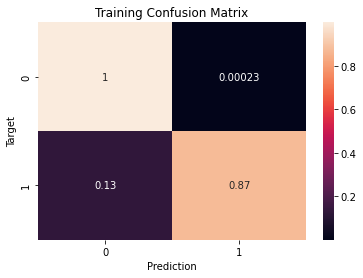

In [ ]:
train_preds = predict_and_plot(train_x,train_y, 'Training')

Accuracy: 89.79%


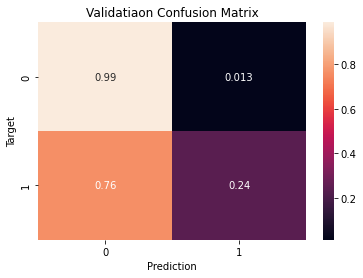

In [ ]:
val_preds = predict_and_plot(val_x, val_y, 'Validatiaon')

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/auction-car-ml-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/auction-car-ml-project


'https://jovian.ai/nimesh-singh-mech/auction-car-ml-project'

## New Model and Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_2 = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
model_2.fit(train_x,train_y)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:32:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model_2.feature_importances_
}).sort_values('importance', ascending=False)

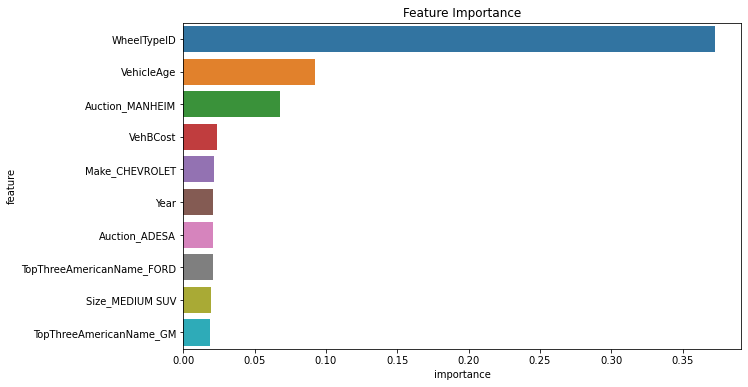

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
def predict_and_plot_2(inputs, targets, name=''):
    preds = model_2.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds


def test_params(**params):
    model_2 = XGBClassifier(**params)
    model_2.fit(train_x, train_y)
    train_preds = predict_and_plot_2(train_x,train_y, 'Training')
    val_preds = predict_and_plot_2(val_x, val_y, 'Validatiaon')
    print('Train Accuracy: {}, Validation Accuracy: {}'.format(train_preds, val_preds))

[05:48:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.97%
Accuracy: 90.20%
Train Accuracy: [0 0 0 ... 0 0 0], Validation Accuracy: [0 0 0 ... 0 0 0]


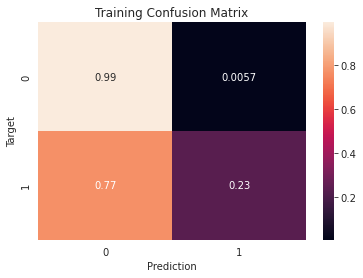

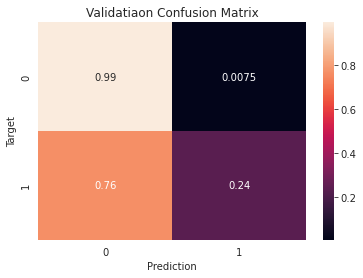

In [ ]:
test_params(n_estimators = 100, use_label_encoder=False,booster='gblinear', objective ='binary:logistic')

In [ ]:
preds = model_2.predict(X_test)
preds_prob = model_2.predict_proba(X_test)

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model_3=DecisionTreeClassifier(max_depth=12,random_state=42)
model_3.fit(train_x,train_y)
print("Train_acc:",model_3.score(train_x,train_y)," | Val_acc:",model_3.score(val_x,val_y))

Train_acc: 0.9842941801116706  | Val_acc: 0.8979242310063712
CPU times: user 1.73 s, sys: 96.1 ms, total: 1.83 s
Wall time: 1.83 s


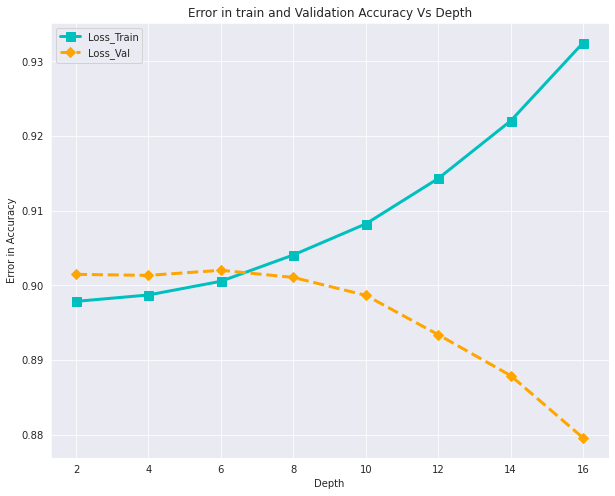

In [ ]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model_3 =DecisionTreeClassifier(max_depth=i, random_state=42)
        model_3.fit(train_x,train_y)
        depth.append(i)
        tr_ac.append(model_3.score(train_x,train_y))
        va_ac.append(model_3.score(val_x,val_y))
        
    #tr_ac=1-np.array(tr_ac);
    #va_ac=1-np.array(va_ac);
    
    tr_ac=np.array(tr_ac);
    va_ac=np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
    
max_depth(2,18)

In [ ]:
model_3=DecisionTreeClassifier(max_depth=6, random_state=42)
model_3.fit(train_x,train_y)
print("Train_acc:",model_3.score(train_x,train_y)," | Val_acc:",model_3.score(val_x,val_y))

Train_acc: 0.9005583530298359  | Val_acc: 0.9020346646571213


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/auction-car-ml-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/auction-car-ml-project


'https://jovian.ai/nimesh-singh-mech/auction-car-ml-project'

In [ ]:
preds=model_3.predict_proba(X_test)
example_entry['IsBadBuy']=preds[:,1]
example_entry.to_csv('Submissions.csv',index=False)

In [ ]:
from IPython.display import FileLink
FileLink('Submissions.csv')

/home/jovyan/Submissions.csv

## Saving the Model

In [ ]:
import joblib

In [ ]:
model_3 = {
    'model': model_3,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(model_3, 'auction_prediction')

['auction_prediction']

## Biblography


I took inspiration from the following works:

1. https://www.kaggle.com/funxexcel/don-t-get-kicked-pipeline-improved
2. https://www.kaggle.com/balajinagappan/don-t-get-kicked-sklearn-from-scratch
3. https://www.kaggle.com/gauravduttakiit/hyperparameter-tuning-in-decision-trees


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>